# Projeto - Cálculo do diâmetro de um asteroide

#### Amanda Lucio, Nayara Gomes

# Introdução

Atualmente, o estudo aeroespacial tem como um dos seus problemas e estimativa do diâmetro de corpos espaciais, entre estes o asteroide. O objetivo dos modelos é medir o diâmetro de um asteroide a partir de medidas sobre o mesmo. O *Dataset* utilizado será  **"Open Asteroid Dataset"** retirado do site https://www.kaggle.com.

Após baixar no Kaggle o arquivo *Asteroid_Updated.csv* contendo os dados sobre asteroides, vamos preparar nosso ambiente com as bibliotecas necessárias e depois importaremos os dados!

## Importando as bibliotecas

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier, plot_tree

%matplotlib inline

In [69]:
dataAsteroid = pd.read_csv('Data/Asteroid.csv')
dataAsteroid.head()

C:\Users\nayara.gomes\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


# Dataset e Tecnologia

### Variáveis do *Dataset*

In [70]:
dataAsteroid.columns



Index(['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent',
       'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G',
       'moid', 'class', 'n', 'per', 'ma'],
      dtype='object')

#### Dicionário de Variáveis

- a: semi-major axis(au) → semi-eixo maior;
- e: eccentricity → excentricidade;
- i: Inclination with respect to x-y ecliptic plane(deg) → Inclinação em relação ao plano da eclíptica x-y;
- om: Longitude of the ascending node → Longitude do nó ascendente;
- w: argument of perihelion → Argumento do periélio;
- q: perihelion distance(au) → Distância do periélio;
- ad: aphelion distance(au) → Distância afélio;
- per_y: Orbital period(YEARS) → Período Orbital (Years);
- data_arc: data arc-span(d) → Dado arc-span;
- condition_code: Orbit condition code → Código de condição de órbita;
- n_obs_used: Number of observation used → Número de observações usadas;
- H: Absolute Magnitude parameter → Parâmetro de Magnitude absoluto;
- neo: Near Earth Object → Próximo do Objeto da Terra;
- pha: Physically Hazardous Asteroid → Asteróide fisicamente perigoso;
- diameter: Diameter of asteroid(Km) → Diâmetro de asteróide;
- extent: Object bi/triaxial ellipsoid dimensions(Km) → Dimensões do elipsóide bi/triaxial do objeto;
- albedo: geometric albedo → Albedo geométrico;
- rot_per: Rotation Period(h) → Período de Rotação;
- GM: Standard gravitational parameter, Product of mass and gravitational constant → Parâmetro gravitacional padrão, produto de massa e constante gravitacional;
- BV: Color index B-V magnitude difference → Diferença de magnitude do índice de cor B-V;
- UB: Color index U-B magnitude difference → Diferença de magnitude do índice de cor U-B;
- IR: Color index I-R magnitude difference → Diferença de magnitude do índice de cor I-R;
- spec_B: Spectral taxonomic type(SMASSII) → Tipo taxonômico espectral(SMASSII);
- spec_T: Spectral taxonomic type(Tholen) → Tipo taxonômico espectral(Tholen);
- G: Magnitude slope parameter → Parâmetro de inclinação de magnitude;
- moid: Earth Minimum orbit Intersection Distance(au) → Distância mínima de interseção da órbita terrestre;
- class: asteroid orbit class → Classe de órbita de asteroide;
- n: Mean motion(deg/d) → Movimento médio;
- per: orbital Period(d) → Período orbital;
- ma: Mean anomaly(deg) → Anomalia média.

In [71]:
columns = ['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'n_obs_used', 'H', 'diameter','albedo', 'rot_per','moid', 'n', 'per', 'ma']

dataAsteroid=dataAsteroid[columns]


#Removendo dados para atingir melhores resultados com os modelos, pois dados removidos contém informações não válidas sobre o diâmetro
dataAsteroid = dataAsteroid.dropna(subset=["diameter", "rot_per"])  #removendo linhas com diâmetro null
dataAsteroid = dataAsteroid[pd.to_numeric(dataAsteroid['diameter'], errors='coerce').notnull()] #removendo linhas com valores não numéricos no diâmetro
dataAsteroid = dataAsteroid.interpolate()

dataAsteroid = dataAsteroid.astype(float)
dataAsteroid = dataAsteroid.reset_index()


In [72]:
##Analisando a porcentagem de dados faltando

percent_missing = dataAsteroid.isnull().sum() * 100 / len(dataAsteroid)
missing_value_df = pd.DataFrame({'column_name': dataAsteroid.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False)

,column_name,percent_missing
index,index,0.0
n_obs_used,n_obs_used,0.0
per,per,0.0
n,n,0.0
moid,moid,0.0
rot_per,rot_per,0.0
albedo,albedo,0.0
diameter,diameter,0.0
H,H,0.0
data_arc,data_arc,0.0


Podemos então concluir que todos os dados presentes nas outras variáveis do dataset são válidos para serem usados no modelo.

## Diminuindo Dataset

###### Como podemos ver abaixo, nosso dataset possui mais de 10.000 linhas, o que pode prejudicar a performance do projeto.

In [73]:
len(dataAsteroid) #número de rows

11187

###### Sendo assim, foram retirados 6.000 linhas do dataset com o objetivo de melhorar o desempenho.

In [74]:
np.random.seed(10)

remove_n = 6000
dataAsteroid_indices = np.random.choice(dataAsteroid.index, remove_n, replace=False)
dataAsteroid = dataAsteroid.drop(dataAsteroid_indices)

In [75]:
len(dataAsteroid) #número de rows

5187

### Verificação da distribuição dos dados da variável resposta 

Para uma melhor visualização dos dados da variável resposta, construiremos um histograma com a distribuição desses dados.Podemos observar que os dados se agrupam em torno de um intervalo (0 à 20 Km), além de apresentar um pico quando o diâmetro é próximo de 4 Km, com uma frequência de mais de 500 dados.

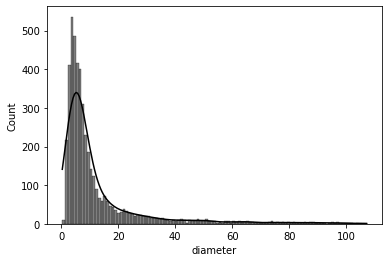

In [112]:
sns.histplot(dataAsteroid['diameter'], color='black', kde=True)
plt.show()

### Histograma dos Valores por Atributo

De mesmo modo, para termos uma melhor visualização da distribuição dos dados de acordo com cada variável do dataset, faremos um histograma para cada uma delas.

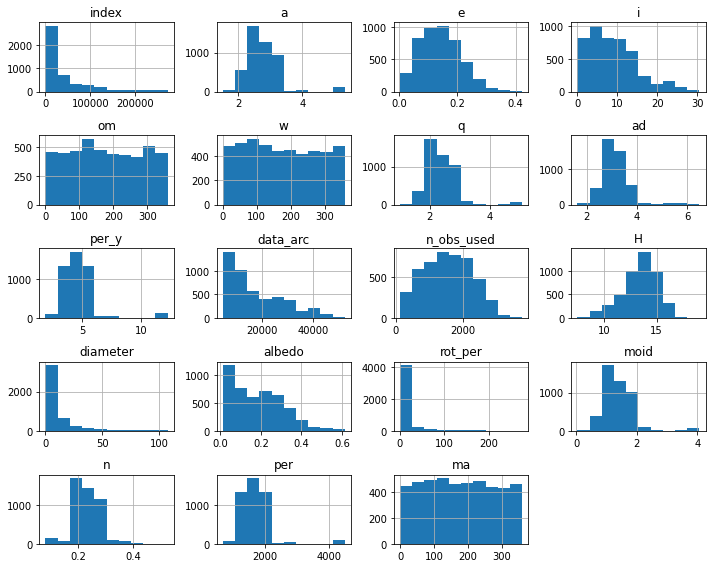

In [117]:
dataAsteroid.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

### Detectar e Remover outliers

Sabemos que é imprescindível dar atenção aos outliers, pois eles podem viesar toda a análise de dados. Portanto, removeremos os outliers a partir dos valores apresentados na tabela abaixo para conseguirmos termos resultados melhores.

In [78]:
dataAsteroid.describe()

,index,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,diameter,albedo,rot_per,moid,n,per,ma
count,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000
mean,46856.055138,2.778960,0.150991,9.691199,178.571297,175.448418,2.366787,3.191132,4.815596,18020.740891,1559.649508,13.365408,15.458371,0.191017,25.257440,1.387585,0.235739,1758.896596,178.902467
std,75297.252129,1.093906,0.090669,6.961456,103.292974,104.865684,0.907440,1.390011,5.648757,11664.987548,768.049711,2.035764,30.626553,0.143423,83.281266,0.896642,0.098681,2063.208670,102.531026
min,1.000000,0.661837,0.002606,0.081659,0.000738,0.029757,0.139981,1.014592,0.538437,3.000000,58.000000,3.200000,0.002500,0.011600,0.043333,0.000316,0.003522,196.664194,0.057141
25%,3761.000000,2.384381,0.089574,4.408852,91.657945,84.350314,1.982516,2.789821,3.681898,8665.500000,969.000000,12.300000,3.975500,0.070000,4.670500,0.991856,0.187034,1344.813106,92.460128
50%,16158.000000,2.665997,0.138592,8.484207,172.446236,171.418018,2.264013,3.062928,4.353091,13920.000000,1546.000000,13.600000,6.584000,0.170000,7.576600,1.280810,0.226420,1589.966597,177.679834
75%,55291.500000,3.028234,0.193889,13.181065,270.880700,267.949537,2.657737,3.400997,5.269779,24602.000000,2110.500000,14.700000,12.732500,0.273000,15.000000,1.663290,0.267695,1924.786651,265.475537
max,729174.000000,42.781267,0.889898,64.006900,359.899762,359.988886,40.465671,47.240969,279.826385,72684.000000,9325.000000,29.900000,900.000000,1.000000,1641.000000,39.507000,1.830531,102206.587270,359.903144


In [79]:
# Removendo outliers a partir dos valores acima
numOfOutliers= len(dataAsteroid)- len(dataAsteroid[(np.abs(stats.zscore(dataAsteroid)) < 3).all(axis=1)])
dataAsteroid=pd.DataFrame(dataAsteroid[(np.abs(stats.zscore(dataAsteroid)) < 3).all(axis=1)])

# dataAsteroid = dataAsteroid[dataAsteroid.a < 20]
# dataAsteroid = dataAsteroid[dataAsteroid.q < 6]
# dataAsteroid = dataAsteroid[dataAsteroid.n_obs_used < 6000]
# dataAsteroid = dataAsteroid[dataAsteroid.per_y < 15]
# dataAsteroid = dataAsteroid[dataAsteroid.diameter < 400]
# dataAsteroid = dataAsteroid.reset_index()

### Analisando correlações

In [80]:
corr_matrix = dataAsteroid.corr()
corr_matrix["diameter"].sort_values(ascending=False).head()

diameter      1.000000
data_arc      0.629497
n_obs_used    0.502849
a             0.446125
per           0.441462
Name: diameter, dtype: float64

<AxesSubplot:>

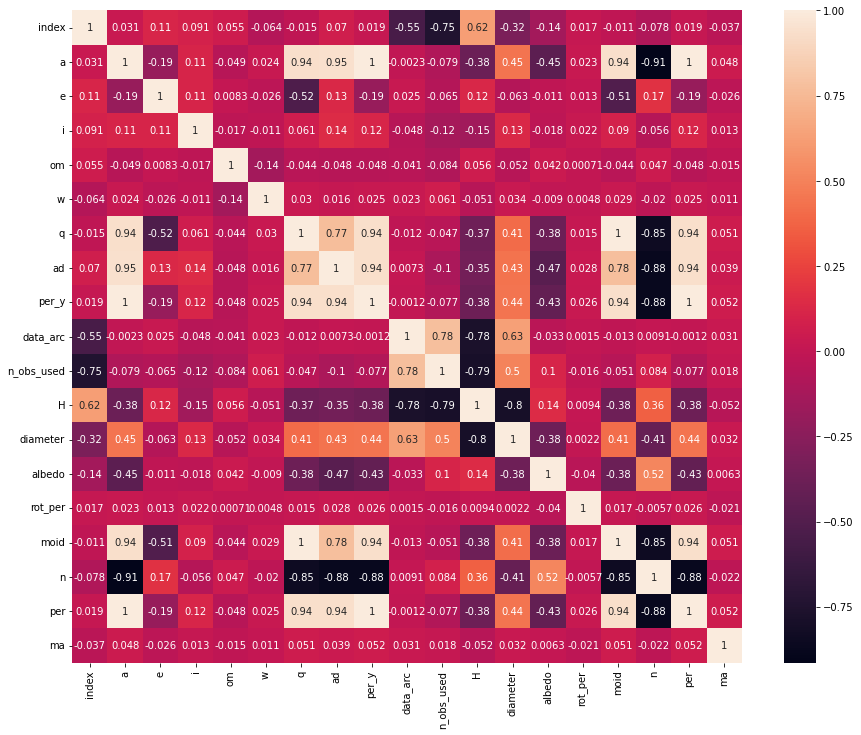

In [81]:
plt.subplots(figsize=(15,12))
sns.heatmap(corr_matrix,annot=True,annot_kws={'size':10})

### Definindo X e y

In [82]:
X = dataAsteroid.drop(['diameter'],axis = 1)
y = dataAsteroid['diameter']
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1242)


In [83]:
X

,index,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,albedo,rot_per,moid,n,per,ma
75,76,2.668111,0.132298,2.422958,1.149350,61.830284,2.315125,3.021097,4.358269,51236.0,2817.0,8.52,0.1770,9.0120,1.329080,0.226151,1591.857740,283.372844
141,142,2.760357,0.074406,11.444569,332.983835,252.396104,2.554970,2.965745,4.586233,50966.0,2594.0,9.12,0.0440,22.0050,1.575910,0.214910,1675.121685,81.082066
153,154,2.755993,0.277138,11.387527,40.994893,45.859915,1.992201,3.519784,4.575360,52511.0,2202.0,11.39,0.0270,7.9597,1.025790,0.215420,1671.150404,89.093191
156,157,2.870949,0.051580,1.005095,277.699087,145.264275,2.722867,3.019032,4.864593,46100.0,2769.0,9.27,0.2130,14.2180,1.735520,0.202612,1776.792538,215.300126
158,159,2.727734,0.066975,3.823882,8.599983,52.361985,2.545043,2.910424,4.505169,44502.0,2746.0,9.08,0.0625,11.0330,1.559190,0.218777,1645.513140,3.820287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10942,270252,2.424044,0.218163,10.077711,172.488905,204.148419,1.895206,2.952881,3.774147,6521.0,407.0,16.30,0.0400,52.7380,0.899505,0.261152,1378.507338,251.341642
10944,271623,2.666877,0.192752,4.405916,111.272850,217.611731,2.152830,3.180924,4.355246,7637.0,308.0,16.30,0.0480,7.4390,1.142610,0.226308,1590.753469,136.957597
10945,271715,3.154176,0.089834,17.653518,241.722441,42.122387,2.870824,3.437529,5.601923,5408.0,331.0,14.90,0.0470,19.3570,1.877440,0.175944,2046.102395,286.839428
10947,272554,2.630973,0.268370,12.324045,247.951634,198.002300,1.924898,3.337048,4.267591,6318.0,506.0,15.30,0.2510,4.9350,0.944417,0.230956,1558.737564,45.577334


### Geramos os folds para validação cruzada

In [84]:
kf = KFold(n_splits=10, shuffle=True, random_state=111)

In [85]:
def avalia_classificador(model, kf, X, y, function_RMSE):
    metric_valid = []
    metric_train = []
    y_preds = np.zeros(X.shape[0])
    # a cada iteração em kf, temos k-1 conjuntos para treino e 1 para validação
    # train e valid recebem os indices de treino e validação em cada rodada.
    for train, valid in kf.split(X,y):
        x_train = X.iloc[train] # escolhe apenas os indices de treino
        y_train = y.iloc[train]
        x_valid = X.iloc[valid] # escolhe apenas os indices de validação
        y_valid = y.iloc[valid]
        model.fit(x_train, y_train) # treina o classificador com dados de treino
        y_pred_train = model.predict(x_train) # faz predições nos dados de treino
        y_pred_valid = model.predict(x_valid) # faz predições nos dados de validação
        y_preds[valid] = y_pred_valid # guarda as previsões do fold corrente
        
        # salvando métricas obtidas no dado de treino (k-1 folds) e validação (1 fold)
        metric_valid.append(function_RMSE(y_valid, y_pred_valid)) 
        metric_train.append(function_RMSE(y_train, y_pred_train)) 
    
    # retorna as previsões e a média das métricas de treino e validação
    # obtidas nas iterações do Kfold
    return y_preds, np.array(metric_valid).mean(), np.array(metric_train).mean()

In [86]:
from sklearn.metrics import mean_squared_error
def function_RMSE(y_real, y_pred): 
    return mean_squared_error(y_real, y_pred)**0.5

Modelos: 

* Modelos Lineares
    * Regressão Linear
* Modelos não-lineares    
    * Árvores de decisão
    * Random Forest
    * Gradient Boosting
    * SVM
    * Redes Neurais

#### Baseline

In [87]:
media_valor_m2 = np.mean(y)

In [88]:
#Gera um vetor artificial com o valor da média repetido pelo número de linhas do nosso conjunto.
y_media = np.array([media_valor_m2]*y.shape[0])

#Calcula o desempenho como se a predição do modelo fosse o y médio
print(function_RMSE(y, y_media))

15.777051953283028


#### Regressão Linear

Temos o seguinte modelo para estimar o diâmetro do asteroide:

**diameter = β0 + β1 × 'data_arc' + β2 ×'n_obs_used' + β3 × 'a'....**

In [89]:
from sklearn.linear_model import LinearRegression

modelLinearRegression = LinearRegression(fit_intercept=True, normalize=True) 

In [90]:
preds, rmse_val, rmse_train = avalia_classificador(modelLinearRegression, kf, X, y, function_RMSE) # treina, valida e calcula desempenho
print('RMSE (validação): ', rmse_val)
print('RMSE (treino): ', rmse_train)

RMSE (validação):  7.644422661767545
RMSE (treino):  7.609493230200696


C:\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardSca

In [91]:
coeff_df = pd.DataFrame(modelLinearRegression.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)

             Coefficient
index       5.029859e-05
a          -8.987151e+14
e          -1.148737e+01
i          -2.926201e-01
om         -2.756503e-03
w           1.968880e-04
q           4.493576e+14
ad          4.493576e+14
per_y       1.124608e+13
data_arc    1.112772e-04
n_obs_used -7.395635e-03
H          -1.081003e+01
albedo     -3.091836e+01
rot_per    -3.173511e-03
moid       -1.732654e+00
n           1.743630e+02
per        -3.079010e+10
ma         -2.552791e-03


In [92]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Cria uma nova matriz de atributos com as features polinomiais de grau 2
X_new = PolynomialFeatures(2).fit_transform(X) 

# Reescalona os dados entre 0 e 1 (valor padrão do MinMaxScaler)
X_new = MinMaxScaler().fit_transform(X_new)
X_new = pd.DataFrame(X_new)
print('Número de atributos após transformação:', X_new.shape[1])
preds, rmse_val, rmse_train = avalia_classificador(modelLinearRegression, kf, X_new, y, function_RMSE) 
print('RMSE (validação): ', rmse_val)
print('RMSE (treino): ', rmse_train)

Número de atributos após transformação: 190


C:\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardSca

RMSE (validação):  3.605040478740431
RMSE (treino):  3.3251411438096374


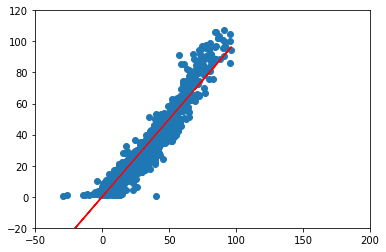

In [93]:
plt.scatter(preds, y);
plt.plot(preds,preds, c ='r')
ax = plt.gca()
ax.set_xlim([-50, 200])
ax.set_ylim([-20, 120])

plt.show()

#### Árvore de decisão

In [94]:
from sklearn import tree
modelTreeDecision = tree.DecisionTreeRegressor(max_features=5, max_depth=3, random_state=10)

In [95]:
preds, rmse_val, rmse_train = avalia_classificador(modelTreeDecision, kf, X, y, function_RMSE) 
print('RMSE (validação): ', rmse_val)
print('RMSE (treino): ', rmse_train)

RMSE (validação):  10.047796281090545
RMSE (treino):  9.510884876684859


In [96]:
import graphviz 

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

columns = ['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'n_obs_used', 'H', 'diameter','albedo', 'rot_per','moid', 'n', 'per', 'ma']

dot_data = tree.export_graphviz(modelTreeDecision, out_file=None, 
                                feature_names=columns,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

ModuleNotFoundError: No module named 'graphviz'

#### Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

modelRandomForest = RandomForestRegressor(n_estimators=100, random_state=26)

In [ ]:
preds, rmse_val, rmse_train = avalia_classificador(modelRandomForest, kf, X, y, function_RMSE) 
print('RMSE (validação): ', rmse_val)
print('RMSE (treino): ', rmse_train)

#### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
modelGradientBoosting = GradientBoostingRegressor(learning_rate=0.015, max_depth=3, max_features = 18, min_samples_leaf=1,n_estimators=1500, random_state=2,subsample = 0.2)

In [ ]:
preds, rmse_val, rmse_train = avalia_classificador(modelGradientBoosting, kf, X, y, function_RMSE) 
print('RMSE (validação): ', rmse_val)
print('RMSE (treino): ', rmse_train)

#### SVM

In [ ]:
from sklearn import svm
modelSVM = svm.SVR(gamma='auto')

In [ ]:
preds, rmse_val, rmse_train = avalia_classificador(modelSVM, kf, X, y, function_RMSE) 
print('RMSE (validação): ', rmse_val)
print('RMSE (treino): ', rmse_train)

#### Redes Neurais

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

modelRedesNeurais = Sequential()
modelRedesNeurais.add(Dense(units=9, activation='relu', input_dim = 18))
modelRedesNeurais.add(Dense(units=9, activation='relu'))
#activation='linear' não faz nenhum calculo adicional
modelRedesNeurais.add(Dense(units=1, activation='linear'))
#mean_absolute_error = considera a média dos erros com valores absolutos.
modelRedesNeurais.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error','acc'])
#batch_size = numero de execuções antes de atualizar os erros.

In [ ]:
preds, rmse_val, rmse_train = avalia_classificador(modelRedesNeurais, kf, X, y, function_RMSE) 
print('RMSE (validação): ', rmse_val)
print('RMSE (treino): ', rmse_train)